In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emp_sal = pd.read_csv('salary_data.csv')

In [3]:
emp_sal

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
emp_sal.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
emp_sal.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
emp_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
emp_sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
emp_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


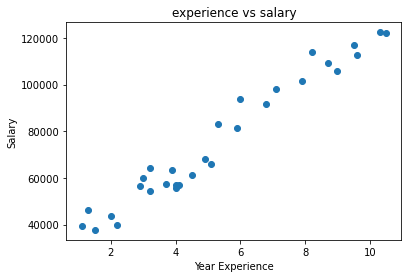

In [9]:
plt.scatter(x=emp_sal['YearsExperience'],y=emp_sal['Salary'])
plt.title('experience vs salary')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.show()

In [10]:
x =emp_sal.iloc[:,:-1].values
y = emp_sal.iloc[:,-1].values

In [11]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=41)

In [15]:
x_train

array([[ 4.9],
       [ 3.2],
       [ 5.9],
       [ 3.7],
       [ 7.9],
       [ 5.3],
       [ 2.2],
       [ 9. ],
       [ 3. ],
       [ 8.2],
       [10.3],
       [ 9.6],
       [ 4.1],
       [ 7.1],
       [ 6. ],
       [ 1.3],
       [ 5.1],
       [ 1.5],
       [ 4. ],
       [ 2. ],
       [ 1.1]])

In [16]:
x_test

array([[ 4. ],
       [10.5],
       [ 3.9],
       [ 6.8],
       [ 9.5],
       [ 2.9],
       [ 8.7],
       [ 4.5],
       [ 3.2]])

In [17]:
y_train

array([ 67938,  64445,  81363,  57189, 101302,  83088,  39891, 105582,
        60150, 113812, 122391, 112635,  57081,  98273,  93940,  46205,
        66029,  37731,  56957,  43525,  39343], dtype=int64)

In [18]:
y_test

array([ 55794, 121872,  63218,  91738, 116969,  56642, 109431,  61111,
        54445], dtype=int64)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test)

In [23]:
y_pred

array([ 64150.92490713, 125415.11884062,  63208.39884661,  90541.65460156,
       115989.85823547,  53783.13824146, 108449.64975135,  68863.55520971,
        56610.71642301])

In [24]:
y_test

array([ 55794, 121872,  63218,  91738, 116969,  56642, 109431,  61111,
        54445], dtype=int64)

In [25]:
lr_diff = y_test - y_pred

In [26]:
new_df = pd.DataFrame({
                     'prediction': y_pred,
                     'original data':y_test,
                     'difference':lr_diff,
                     })

In [27]:
new_df

,prediction,original data,difference
0,64150.924907,55794,-8356.924907
1,125415.118841,121872,-3543.118841
2,63208.398847,63218,9.601153
3,90541.654602,91738,1196.345398
4,115989.858235,116969,979.141765
5,53783.138241,56642,2858.861759
6,108449.649751,109431,981.350249
7,68863.555210,61111,-7752.555210
8,56610.716423,54445,-2165.716423


Text(0.5, 1.0, 'Salary vs Experience (Training Dataset)')

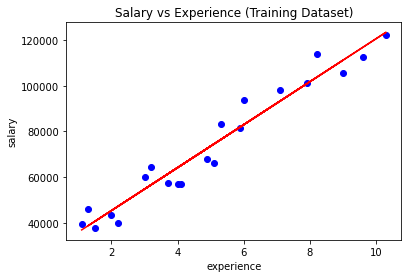

In [28]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,lr.predict(x_train),color="red")
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("Salary vs Experience (Training Dataset)")

Text(0.5, 1.0, 'Salary vs Experience (Testing Dataset)')

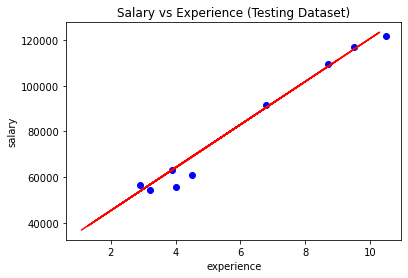

In [29]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,lr.predict(x_train),color="red")
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("Salary vs Experience (Testing Dataset)")

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [32]:
rmse

4199.345410380414

In [33]:
r2_score(y_test,y_pred)*100

97.5706195471673

In [34]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 26449.882486518873
Coefficient of the line: [9425.26060515]


In [35]:
inputFeatures = [[1]]

In [36]:
#predicting for single employee
Estimated_Salary = int (lr.predict(inputFeatures))

In [37]:
Estimated_Salary

35875

decision tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt = DecisionTreeRegressor()

In [40]:
x_train

array([[ 4.9],
       [ 3.2],
       [ 5.9],
       [ 3.7],
       [ 7.9],
       [ 5.3],
       [ 2.2],
       [ 9. ],
       [ 3. ],
       [ 8.2],
       [10.3],
       [ 9.6],
       [ 4.1],
       [ 7.1],
       [ 6. ],
       [ 1.3],
       [ 5.1],
       [ 1.5],
       [ 4. ],
       [ 2. ],
       [ 1.1]])

In [41]:
x_test

array([[ 4. ],
       [10.5],
       [ 3.9],
       [ 6.8],
       [ 9.5],
       [ 2.9],
       [ 8.7],
       [ 4.5],
       [ 3.2]])

In [42]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [43]:
y_pred_dt = dt.predict(x_test)

In [44]:
y_pred_dt

array([ 56957., 122391.,  56957.,  98273., 112635.,  60150., 105582.,
        57081.,  64445.])

In [45]:
y_test

array([ 55794, 121872,  63218,  91738, 116969,  56642, 109431,  61111,
        54445], dtype=int64)

In [46]:
dt_diff = y_test - y_pred_dt

In [47]:
new_dt_df = pd.DataFrame({
    'prediction':y_pred_dt,
    'orignal data':y_test,
    'difference': dt_diff,
})

In [48]:
new_dt_df

,prediction,orignal data,difference
0,56957.0,55794,-1163.0
1,122391.0,121872,-519.0
2,56957.0,63218,6261.0
3,98273.0,91738,-6535.0
4,112635.0,116969,4334.0
5,60150.0,56642,-3508.0
6,105582.0,109431,3849.0
7,57081.0,61111,4030.0
8,64445.0,54445,-10000.0


In [49]:
from sklearn.metrics import mean_absolute_error,r2_score

In [50]:
mean_absolute_error(y_test,y_pred_dt)

4466.555555555556

In [51]:
r2_score(y_test,y_pred_dt)

0.9623947646282415

In [52]:
dt.predict([[2]])

array([43525.])

In [53]:
from sklearn import tree

In [54]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 5.20
|   |--- feature_0 <= 2.60
|   |   |--- feature_0 <= 1.40
|   |   |   |--- feature_0 <= 1.20
|   |   |   |   |--- value: [39343.00]
|   |   |   |--- feature_0 >  1.20
|   |   |   |   |--- value: [46205.00]
|   |   |--- feature_0 >  1.40
|   |   |   |--- feature_0 <= 1.75
|   |   |   |   |--- value: [37731.00]
|   |   |   |--- feature_0 >  1.75
|   |   |   |   |--- feature_0 <= 2.10
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |   |--- feature_0 >  2.10
|   |   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.60
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.45
|   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |--- value: [64445.00]
|   |   |   |--- feature_0 >  3.45
|   |   |   |   |--- feature_0 <= 3.85
|   |   |   |   |   |--- value: [57189.00]
|   |   |   |   |--- feature_0 >  3.85
|   |   |   |   |   |--- feature_0 <= 4.05
|   |   |  

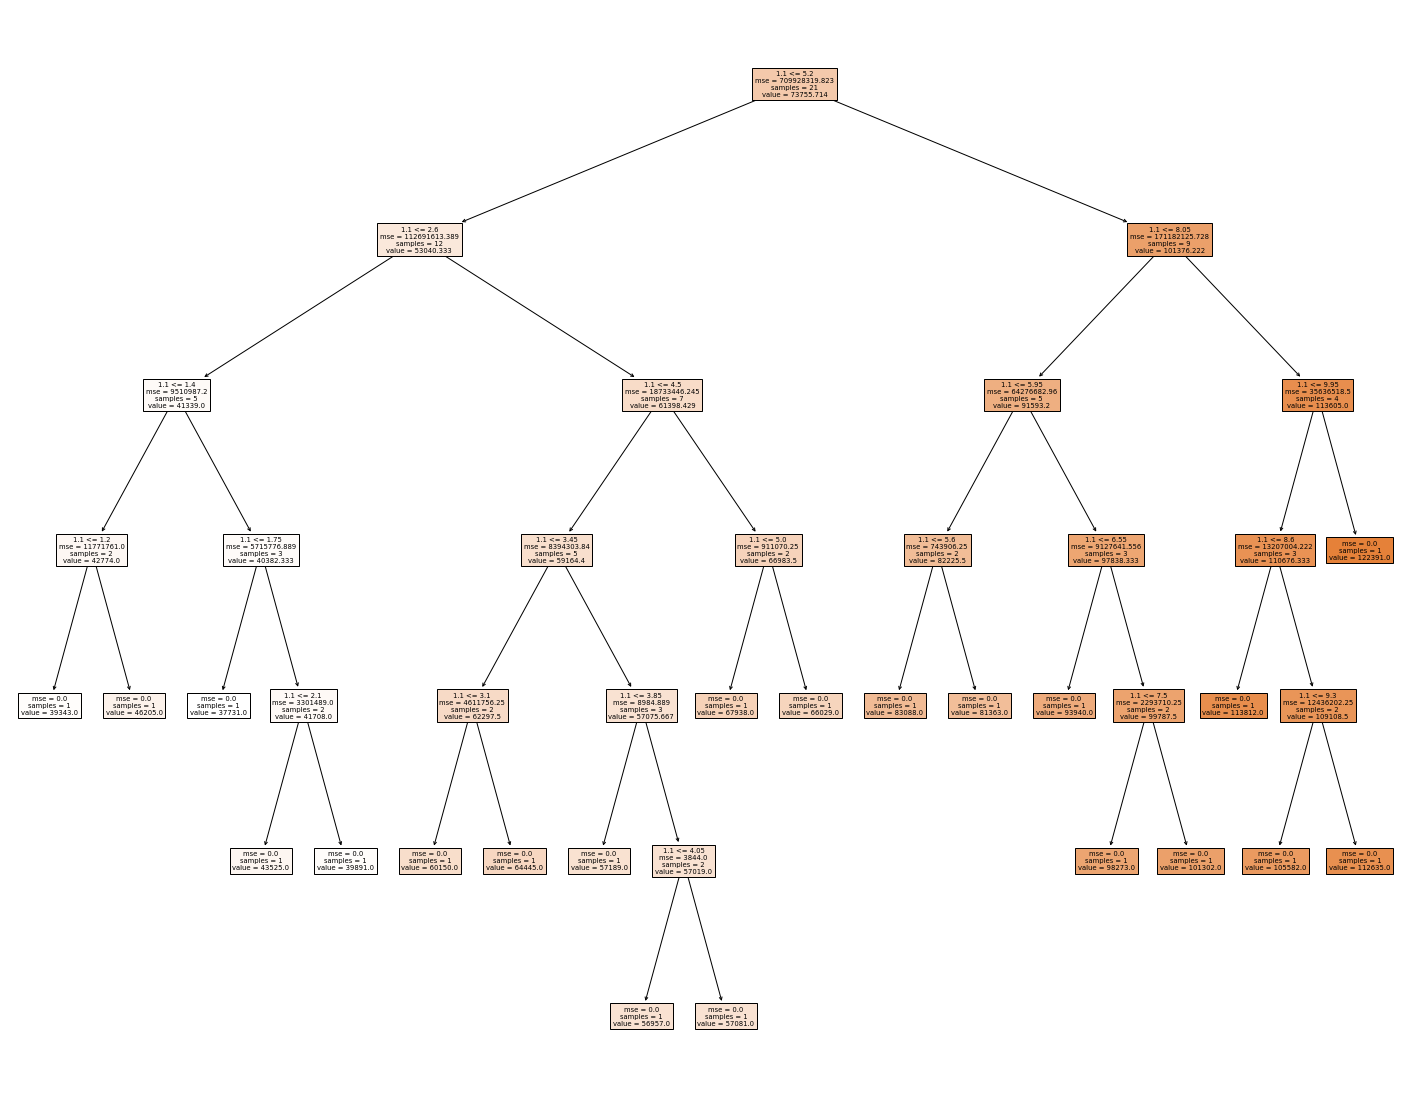

In [55]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(dt,feature_names=emp_sal['YearsExperience'],filled=True)